### 【例 7.1】
### 应用 sklearn 库中朴素贝叶斯(高斯)分类模型进行分析的示例代码。数据源是通过 sklearn 中的聚类生成器(make blobs)生成的 50000 个随机样本，每个样本的特征数为 2 个，共有 3 个类簇，样本集的标准差是 1.0，随机数种子为 42。

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

n_samples=50000
centers = [(-5, -5), (0, 0), (5, 5)]
X,y=make_blobs(n_samples=50000,n_features=2,cluster_std=1.0,centers=centers,
               shuffle=False, random_state=42)
y[:n_samples // 2] = 0
y[n_samples // 2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])
X_train, X_test, y_train, y_test,sw_train,sw_test=train_test_split(X, y, sample_weight, 
                                                                   test_size=0.9, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
prob_pos_clf = clf.predict_proba(X_test)[:, 1]
target_pred = clf.predict(X_test)
score = accuracy_score(y_test, target_pred, normalize = True)
print("accuracy score:",score)

accuracy score: 0.8349111111111112


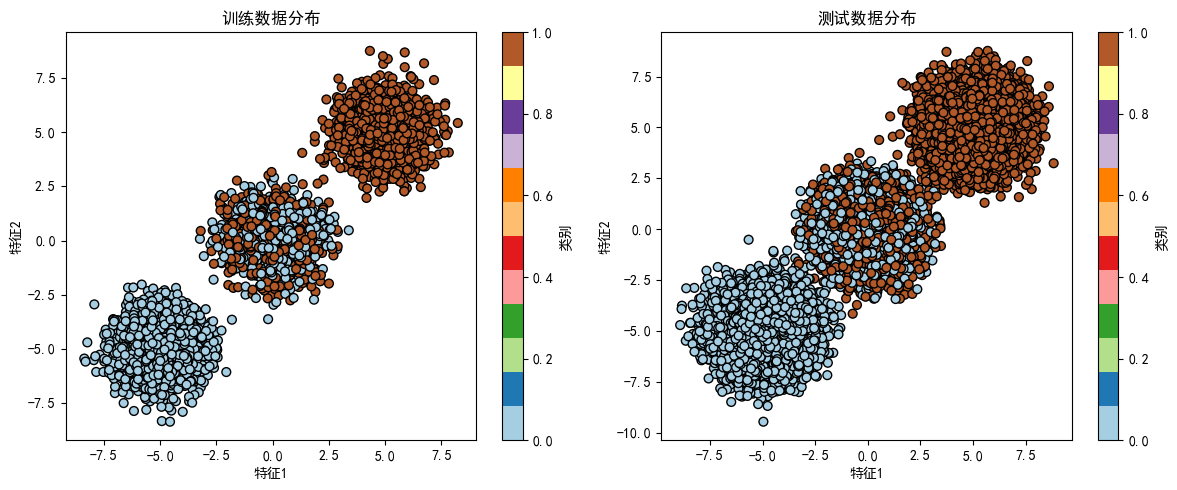

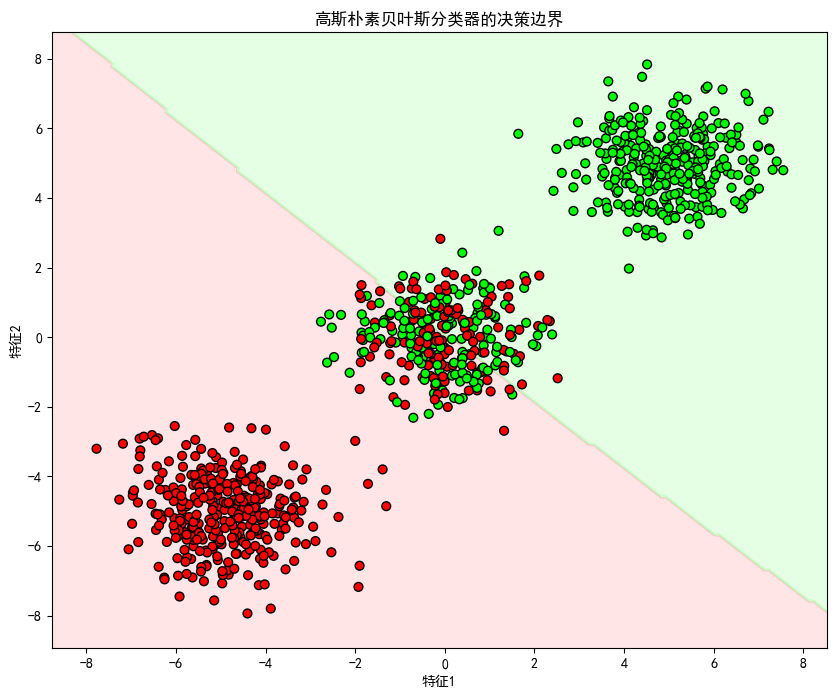

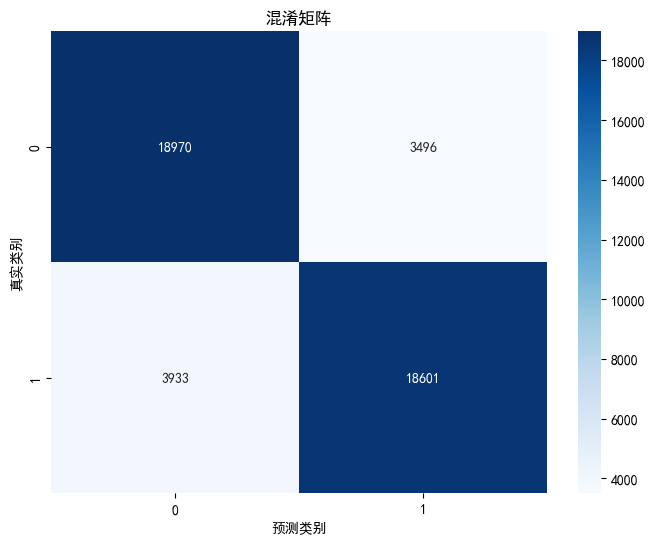

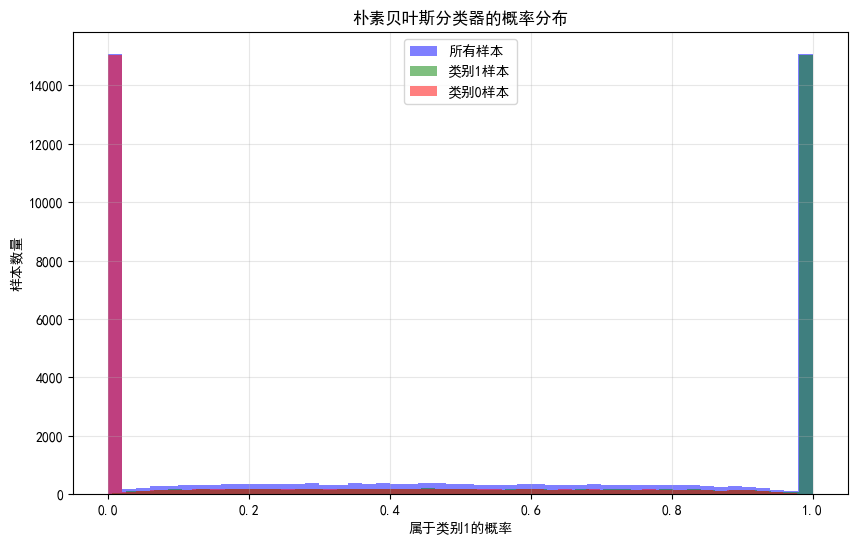


分类报告:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     22466
           1       0.84      0.83      0.83     22534

    accuracy                           0.83     45000
   macro avg       0.84      0.83      0.83     45000
weighted avg       0.84      0.83      0.83     45000



In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 可视化数据分布
plt.figure(figsize=(12, 5))

# 绘制训练数据
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', s=40)
plt.title('训练数据分布')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.colorbar(label='类别')

# 绘制测试数据
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=40)
plt.title('测试数据分布')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.colorbar(label='类别')

plt.tight_layout()
plt.show()

# 可视化决策边界
def plot_decision_boundary(X, y, model, title):
    h = 0.1  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # 对网格点进行预测
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 创建自定义颜色映射
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    plt.figure(figsize=(10, 8))
    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    # 绘制数据点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('特征1')
    plt.ylabel('特征2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# 绘制决策边界
plot_decision_boundary(X_test[:1000], y_test[:1000], clf, '高斯朴素贝叶斯分类器的决策边界')

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, target_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵')
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.show()

# 可视化概率分布
plt.figure(figsize=(10, 6))
plt.hist(prob_pos_clf, bins=50, alpha=0.5, color='blue', label='所有样本')
plt.hist(prob_pos_clf[y_test == 1], bins=50, alpha=0.5, color='green', label='类别1样本')
plt.hist(prob_pos_clf[y_test == 0], bins=50, alpha=0.5, color='red', label='类别0样本')
plt.title('朴素贝叶斯分类器的概率分布')
plt.xlabel('属于类别1的概率')
plt.ylabel('样本数量')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 打印详细的分类报告
print("\n分类报告:")
print(classification_report(y_test, target_pred))